# XGBoost

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_excel('../data/freshwater_datamaster.xlsx', sheet_name='main')
df = df[['SHIP-ROUTE','DISTANCE', 'FRESH_WATER']]

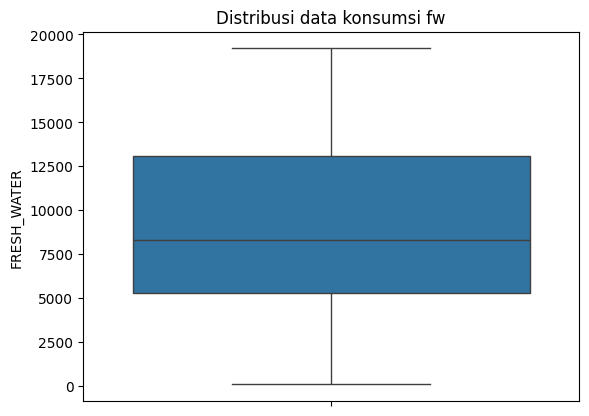

In [4]:
import seaborn as sns
sns.boxplot(data=df, y='FRESH_WATER')
plt.title("Distribusi data konsumsi fw")
plt.show()


In [5]:
print(df.columns.tolist())

['SHIP-ROUTE', 'DISTANCE', 'FRESH_WATER']


In [6]:
df = df.rename(columns={'SHIP-ROUTE': 'SHIP_ROUTE'})
print(df.columns.tolist())

['SHIP_ROUTE', 'DISTANCE', 'FRESH_WATER']


In [7]:
df_encoded = pd.get_dummies(df, columns=['SHIP_ROUTE'])

In [8]:
X = df_encoded.drop(columns=['FRESH_WATER'])
y = df_encoded['FRESH_WATER']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### XGBoost

In [10]:
# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)


In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 8,
    'seed': 200,
    'eval_metric': 'rmse'
}


xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=15000,
    evals=[(dvalid, "validation")],
    early_stopping_rounds=50,
    verbose_eval=True
)


y_pred = xgb_model.predict(dvalid)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


[0]	validation-rmse:4262.62784
[1]	validation-rmse:3872.43255
[2]	validation-rmse:3522.64876
[3]	validation-rmse:3209.59141
[4]	validation-rmse:2926.66404
[5]	validation-rmse:2678.14709
[6]	validation-rmse:2455.77283
[7]	validation-rmse:2257.63819
[8]	validation-rmse:2085.61740
[9]	validation-rmse:1929.57193
[10]	validation-rmse:1794.46429
[11]	validation-rmse:1669.46938
[12]	validation-rmse:1560.71646
[13]	validation-rmse:1465.27890
[14]	validation-rmse:1381.56178
[15]	validation-rmse:1307.56785
[16]	validation-rmse:1246.00590
[17]	validation-rmse:1190.18081
[18]	validation-rmse:1142.78599
[19]	validation-rmse:1102.04403
[20]	validation-rmse:1070.60695
[21]	validation-rmse:1044.19938
[22]	validation-rmse:1020.45111
[23]	validation-rmse:997.61942
[24]	validation-rmse:978.41436
[25]	validation-rmse:962.69631
[26]	validation-rmse:946.96117
[27]	validation-rmse:933.38047
[28]	validation-rmse:922.83642
[29]	validation-rmse:911.24663
[30]	validation-rmse:904.56296
[31]	validation-rmse:895.8

## try regressor.

In [59]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define model parameters
params = {
    'n_jobs': 1,
    'learning_rate': 0.35,
    'max_depth': 8,
    'n_estimators': 1000,
    'random_state': 500,
    'EarlyStopping': 50,
    'objective': 'reg:squarederror',
}

# Initialize the XGBRegressor
xgb_regressor = XGBRegressor(**params)

# Train the model
xgb_regressor.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Predict on the test set
y_pred = xgb_regressor.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


[0]	validation_0-rmse:3192.72625
[1]	validation_0-rmse:2251.64547
[2]	validation_0-rmse:1657.14331
[3]	validation_0-rmse:1308.70082
[4]	validation_0-rmse:1107.05338
[5]	validation_0-rmse:1001.11455
[6]	validation_0-rmse:949.57973
[7]	validation_0-rmse:902.40872
[8]	validation_0-rmse:875.67324
[9]	validation_0-rmse:868.66364
[10]	validation_0-rmse:849.29163
[11]	validation_0-rmse:841.84901
[12]	validation_0-rmse:837.11083
[13]	validation_0-rmse:834.14485
[14]	validation_0-rmse:829.55655
[15]	validation_0-rmse:830.41786
[16]	validation_0-rmse:828.93137
[17]	validation_0-rmse:824.08415
[18]	validation_0-rmse:823.80361
[19]	validation_0-rmse:824.69575
[20]	validation_0-rmse:822.03617
[21]	validation_0-rmse:822.63676
[22]	validation_0-rmse:822.99577
[23]	validation_0-rmse:819.63089
[24]	validation_0-rmse:821.12752
[25]	validation_0-rmse:820.73563
[26]	validation_0-rmse:819.69223
[27]	validation_0-rmse:820.26976
[28]	validation_0-rmse:820.51155
[29]	validation_0-rmse:820.20806
[30]	validatio

c:\Users\ilham\miniconda3\envs\vision1\lib\site-packages\xgboost\core.py:158: UserWarning: [23:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "EarlyStopping" } are not used.

  warnings.warn(smsg, UserWarning)


[93]	validation_0-rmse:827.91296
[94]	validation_0-rmse:828.05115
[95]	validation_0-rmse:828.13991
[96]	validation_0-rmse:828.15177
[97]	validation_0-rmse:827.81062
[98]	validation_0-rmse:827.55207
[99]	validation_0-rmse:827.36060
[100]	validation_0-rmse:827.18351
[101]	validation_0-rmse:827.23746
[102]	validation_0-rmse:827.47071
[103]	validation_0-rmse:827.50927
[104]	validation_0-rmse:827.46357
[105]	validation_0-rmse:827.55752
[106]	validation_0-rmse:827.71761
[107]	validation_0-rmse:827.42829
[108]	validation_0-rmse:827.91458
[109]	validation_0-rmse:827.82943
[110]	validation_0-rmse:828.18290
[111]	validation_0-rmse:828.26375
[112]	validation_0-rmse:828.17334
[113]	validation_0-rmse:828.36085
[114]	validation_0-rmse:828.04609
[115]	validation_0-rmse:828.14545
[116]	validation_0-rmse:828.08238
[117]	validation_0-rmse:827.99847
[118]	validation_0-rmse:828.16261
[119]	validation_0-rmse:828.20963
[120]	validation_0-rmse:828.28131
[121]	validation_0-rmse:828.21942
[122]	validation_0-rm

### Test

In [14]:
import numpy as np

In [16]:
test_df = pd.DataFrame({'DISTANCE': [333]})

route_columns = [col for col in X_train.columns if col.startswith('SHIP_ROUTE_')]
for col in route_columns:
    test_df[col] = 0

test_df = test_df[X_train.columns]
dmatrix_test = xgb.DMatrix(test_df)

prediction = xgb_model.predict(dmatrix_test)
print(f"Predicted Fresh Water Consumption: {prediction[0]:.2f} liters")

Predicted Fresh Water Consumption: 6825.44 liters


C:\Users\ilham\AppData\Local\Temp\ipykernel_23312\3099656019.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ilham\AppData\Local\Temp\ipykernel_23312\3099656019.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ilham\AppData\Local\Temp\ipykernel_23312\3099656019.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1)

In [17]:
distances = [333, 450, 600]
test_df = pd.DataFrame({'DISTANCE': distances})


route_columns = [col for col in X_train.columns if col.startswith('SHIP_ROUTE_')]
for col in route_columns:
    test_df[col] = 0

test_df = test_df[X_train.columns]

dmatrix_test = xgb.DMatrix(test_df)
predictions = xgb_model.predict(dmatrix_test)


for distance, pred in zip(distances, predictions):
    print(f"Distance: {distance} km - Predicted Fresh Water Consumption: {pred:.2f} liters")


Distance: 333 km - Predicted Fresh Water Consumption: 6825.44 liters
Distance: 450 km - Predicted Fresh Water Consumption: 6412.19 liters
Distance: 600 km - Predicted Fresh Water Consumption: 7086.22 liters


C:\Users\ilham\AppData\Local\Temp\ipykernel_23312\164811712.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ilham\AppData\Local\Temp\ipykernel_23312\164811712.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ilham\AppData\Local\Temp\ipykernel_23312\164811712.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

In [ ]:
import pandas as pd
import xgboost as xgb


df_encoded = pd.get_dummies(df, columns=['SHIP_ROUTE'], prefix='SHIP_ROUTE')


for col in X_train.columns:
    if col not in df_encoded.columns:
        df_encoded[col] = 0


df_encoded = df_encoded[X_train.columns]


dmatrix_test = xgb.DMatrix(df_encoded)


predictions = xgb_model.predict(dmatrix_test)


actual = df['FRESH_WATER'].values
errors = actual - predictions
squared_errors = errors ** 2


results_df = pd.DataFrame({
    'DISTANCE': df['DISTANCE'],
    'Actual (At)': actual,
    'Predicted (Ft)': predictions,
    'Error (At - Ft)': errors,
    'Squared Error': squared_errors
})

mse = sum(squared_errors) / len(df)
print(results_df.head(100))
print(f"\nTotal Samples: {len(df)}")
print(f"Manual MSE: {mse:.6f}")


    DISTANCE  Actual (At)  Predicted (Ft)  Error (At - Ft)  Squared Error
0         17          100      378.607452      -278.607452   77622.112529
1         17          100      378.607452      -278.607452   77622.112529
2         50          200      346.599701      -146.599701   21491.472312
3         50          200      664.788208      -464.788208  216028.078303
4         50          200      668.104919      -468.104919  219122.215598
..       ...          ...             ...              ...            ...
95       152         3050     3720.879395      -670.879395  450079.162007
96       235         3100     4043.706055      -943.706055  890581.117654
97       252         3200     3382.151611      -182.151611   33179.209509
98       235         3200     4043.706055      -843.706055  711839.906716
99       152         3200     3720.879395      -520.879395  271315.343647

[100 rows x 5 columns]

Total Samples: 1185
Manual MSE: 532018.737587


In [35]:
target_distances = [456, 92, 204, 333]


filtered_results = results_df[results_df['DISTANCE'].isin(target_distances)].copy()
distance_errors = filtered_results.groupby('DISTANCE').agg({
    'Actual (At)': 'mean',
    'Predicted (Ft)': 'mean',
    'Error (At - Ft)': 'mean',
    'Squared Error': 'mean'
}).reset_index()


distance_errors['Absolute Error'] = distance_errors['Error (At - Ft)'].abs()


print(distance_errors)


   DISTANCE  Actual (At)  Predicted (Ft)  Error (At - Ft)  Squared Error  \
0        92  1542.400000     1554.832886       -12.432935   80319.880979   
1       204  3066.666667     3285.467041      -218.800374  143429.159371   
2       333  8588.909091     8485.826172       103.083185  364789.333598   
3       456  8478.461538     8507.310547       -28.849008  864552.975346   

   Absolute Error  
0       12.432935  
1      218.800374  
2      103.083185  
3       28.849008  


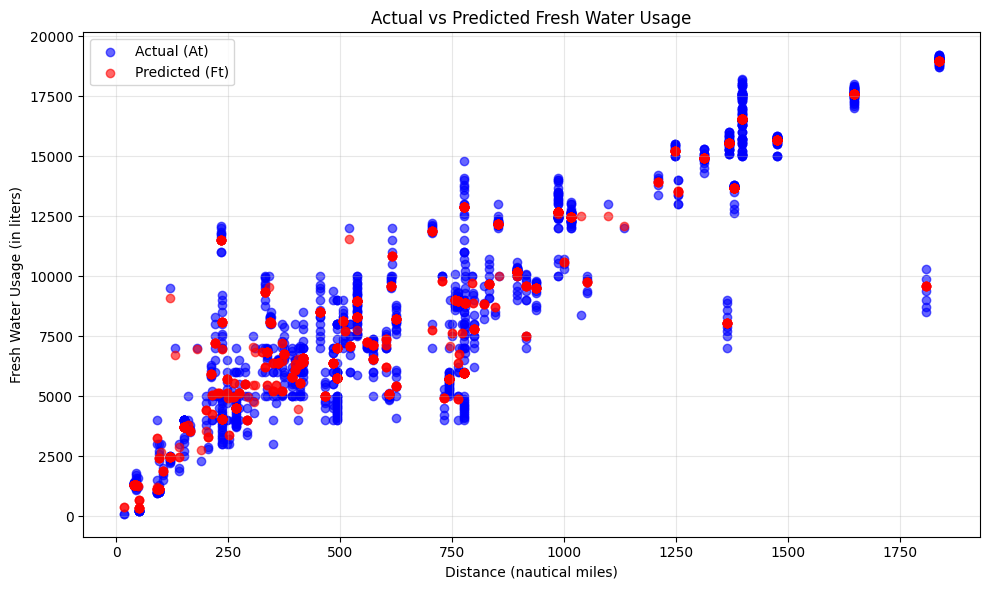

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(results_df['DISTANCE'], results_df['Actual (At)'], color='blue', label='Actual (At)', alpha=0.6)
plt.scatter(results_df['DISTANCE'], results_df['Predicted (Ft)'], color='red', label='Predicted (Ft)', alpha=0.6)

plt.title('Actual vs Predicted Fresh Water Usage')
plt.xlabel('Distance (nautical miles)')
plt.ylabel('Fresh Water Usage (in liters)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## save model

In [1]:
import joblib
joblib.dump(xgb_model, '../models/modelxgb.pkl')
joblib.dump(scaler, '../models/scalerXGB.pkl')

NameError: name 'xgb_model' is not defined

## test saved model

In [43]:
import joblib 
import pandas as pd
import xgboost as xgb

In [44]:
xgb_model = joblib.load("../models/modelxgb.pkl")
scaler = joblib.load("../models/scalerxgb.pkl")


In [13]:
distances = [333, 450, 600]
test_df = pd.DataFrame({'DISTANCE': distances})

model_features = xgb_model.feature_names if hasattr(xgb_model, 'feature_names') else None

if model_features is None:
    raise ValueError("Model does not have 'feature_names' attribute. Ensure the model was trained with feature names.")

for col in model_features:
    if col not in test_df.columns:
        test_df[col] = 0


test_df = test_df[model_features]
test_df_scaled = scaler.transform(test_df)

dmatrix_test = xgb.DMatrix(test_df_scaled, feature_names=model_features)
predictions = xgb_model.predict(dmatrix_test)

for distance, pred in zip(distances, predictions):
    print(f"Distance: {distance} km - Predicted Fresh Water Consumption: {pred:.2f} liters")

Distance: 333 km - Predicted Fresh Water Consumption: 378.61 liters
Distance: 450 km - Predicted Fresh Water Consumption: 378.61 liters
Distance: 600 km - Predicted Fresh Water Consumption: 378.61 liters


C:\Users\ilham\AppData\Local\Temp\ipykernel_23312\3979037461.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ilham\AppData\Local\Temp\ipykernel_23312\3979037461.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ilham\AppData\Local\Temp\ipykernel_23312\3979037461.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis